**Feature Importance** - Feature importance methods assign scores to each feature in a dataset, indicating how much each feature contributes to the model's ability to make accurate predictions.

**1. Random Forest Regressor** - only categorical variables

Top categorical are: Theanine mg, Country Japan, Min Elevation m

**2. Correlation Matrix** - only numerical variables

Top numerical correlations are: Theanine, Latitude, Longitude, Caffeine, Elevation


**3. Random Forest Regressor** - categorical and numerical both

Top Variables are: Theanine mg, Latitude, Longitude, Country Japan, Min Elevation m, Caffeine mg, Max Elevation








In [1]:
pip install matplotlib rasterio shapely geopandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 40.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import math
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
from pandas import read_excel
import shapely
import geopandas as gpd
import os
import scipy.ndimage
import scipy.stats
import shapely
import rasterio
import rasterio.plot
import rasterio.merge
import rasterio.features
import plotly.express as px

from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 191)

In [ ]:
# 1. generate a map from Tea Plantage Locations

In [ ]:
world = gpd.read_file('world.gpkg')

/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'world.gpkg': 'states_provinces' (default), 'countries', 'disputed_borders', 'layer_styles'. Specify layer parameter to avoid this warning.
  result = read_func(


In [ ]:
type(world)
world

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Choose Tea Plantage Location in China, Japa, Nepal, South America, Sri Lanka
# to get geometry dataframe
mrnList = ['Zhejiang','Assam','Yunnan','Anhui','West Bengal',
           'Nepal', 'Sochi','Jiangxi','Misiones','Fukuoka',
           'Parana','Rio Grande do Sul''Corrientes',
           'Nuwara Eliya','Kosi','Mechi',
           'Fujian','Shizuoka','Kagoshima','Kyoto']
filtered_df = world[world['woe_name'].isin(mrnList) ]
filtered_df


,iso_a2,name,fips,woe_label,woe_name,sov_a3,adm0_a3,admin,gu_a3,gn_name,geometry
30,JP,Kagoshima,JA18,"Kagoshima Prefecture, JP, Japan",Kagoshima,JPN,JPN,Japan,JPN,Kagoshima-ken,"MULTIPOLYGON (((129.59156 29.4501, 129.59816 29.47236, 129.61232 29.44335, 129.59156 29.4501)), ((129.71485 29.65453, 129.74594 29.66104, 129.75375 29.64541, 129.72104 29.60615, 129.71485 29.65453..."
418,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu,"MULTIPOLYGON (((136.0031 34.77369, 136.03648 34.71535, 136.00884 34.69592, 135.90988 34.72419, 135.83226 34.69912, 135.70627 34.75953, 135.701 34.82273, 135.64638 34.89919, 135.58276 34.94655, 135..."
1098,CN,Fujian,CH07,"Fujian, CN, China",Fujian,CH1,CHN,China,CHN,Fujian Sheng,"MULTIPOLYGON (((119.30543 26.03596, 119.40122 25.99604, 119.40496 25.97793, 119.38111 25.96699, 119.25758 26.00145, 119.20924 26.09858, 119.25758 26.04755, 119.30543 26.03596)), ((119.62696 26.107..."
1201,IN,West Bengal,IN28,"West Bengal, IN, India",West Bengal,IND,IND,India,IND,State of West Bengal,"MULTIPOLYGON (((88.87289 21.59553, 88.91131 21.56688, 88.90797 21.53071, 88.83872 21.53193, 88.84132 21.614, 88.87289 21.59553)), ((88.05055 21.70539, 88.11931 21.85952, 88.14674 21.86986, 88.167 ..."
1362,CN,Zhejiang,CH02,"Zhejiang, CN, China",Zhejiang,CH1,CHN,China,CHN,Zhejiang Sheng,"MULTIPOLYGON (((122.14324 29.73338, 122.18686 29.67341, 122.16293 29.65453, 122.16977 29.67503, 122.14942 29.66885, 122.14942 29.68183, 122.12745 29.66901, 122.10157 29.71971, 122.04005 29.71638, ..."
1782,CN,Yunnan,CH29,"Yunnan, CN, China",Yunnan,CH1,CHN,China,CHN,Yunnan Sheng,"MULTIPOLYGON (((101.76845 21.16045, 101.75599 21.14326, 101.70426 21.13509, 101.65512 21.1892, 101.58179 21.17566, 101.58396 21.22439, 101.51761 21.24263, 101.38149 21.22248, 101.29271 21.17607, 1..."
1957,IN,Assam,IN03,"Assam, IN, India",Assam,IND,IND,India,IND,State of Assam,"MULTIPOLYGON (((89.80857 25.43951, 89.83439 25.63477, 89.78313 25.81445, 89.83439 25.93175, 89.79202 25.94911, 89.82866 25.9794, 89.81413 25.99614, 89.78943 25.98798, 89.75021 26.04156, 89.74985 2..."
2100,PY,Misiones,PA12,"Misiones, PY, Paraguay",Misiones,PRY,PRY,Paraguay,PRY,Departamento de Misiones,"MULTIPOLYGON (((-57.31012 -27.42921, -57.19591 -27.09566, -57.23219 -27.07271, -57.42173 -27.04429, -57.61973 -26.818, -57.70549 -26.4125, -57.63653 -26.45937, -57.56219 -26.54417, -57.4761 -26.56..."
2823,JP,Fukuoka,JA07,"Fukuoka Prefecture, JP, Japan",Fukuoka,JPN,JPN,Japan,JPN,Fukuoka-ken,"MULTIPOLYGON (((130.42916 32.98052, 130.42066 33.08759, 130.34936 33.14204, 130.34675 33.17991, 130.38122 33.23645, 130.45336 33.26471, 130.48395 33.31481, 130.53191 33.33789, 130.52664 33.41424, ..."
2837,JP,Shizuoka,JA37,"Shizuoka Prefecture, JP, Japan",Shizuoka,JPN,JPN,Japan,JPN,Shizuoka-ken,"MULTIPOLYGON (((137.4679 34.67097, 137.46668 34.75245, 137.48844 34.80976, 137.57189 34.84097, 137.61799 34.87927, 137.67044 34.94722, 137.68486 35.00251, 137.77023 35.08117, 137.80557 35.19452, 1..."


In [ ]:
filtered_joined = filtered_df.sjoin(world, how='left')
filtered_joined

,iso_a2_left,name_left,fips_left,woe_label_left,woe_name_left,sov_a3_left,adm0_a3_left,admin_left,gu_a3_left,gn_name_left,...,iso_a2_right,name_right,fips_right,woe_label_right,woe_name_right,sov_a3_right,adm0_a3_right,admin_right,gu_a3_right,gn_name_right
30,JP,Kagoshima,JA18,"Kagoshima Prefecture, JP, Japan",Kagoshima,JPN,JPN,Japan,JPN,Kagoshima-ken,...,JP,Kagoshima,JA18,"Kagoshima Prefecture, JP, Japan",Kagoshima,JPN,JPN,Japan,JPN,Kagoshima-ken
30,JP,Kagoshima,JA18,"Kagoshima Prefecture, JP, Japan",Kagoshima,JPN,JPN,Japan,JPN,Kagoshima-ken,...,JP,Miyazaki,JA25,"Miyazaki Prefecture, JP, Japan",Miyazaki,JPN,JPN,Japan,JPN,Miyazaki-ken
30,JP,Kagoshima,JA18,"Kagoshima Prefecture, JP, Japan",Kagoshima,JPN,JPN,Japan,JPN,Kagoshima-ken,...,JP,Kumamoto,JA21,"Kumamoto Prefecture, JP, Japan",Kumamoto,JPN,JPN,Japan,JPN,Kumamoto-ken
418,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu,...,JP,Nara,JA28,"Nara Prefecture, JP, Japan",Nara,JPN,JPN,Japan,JPN,Nara-ken
418,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu,...,JP,Mie,JA23,"Mie Prefecture, JP, Japan",Mie,JPN,JPN,Japan,JPN,Mie-ken
418,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu,...,JP,Ōsaka,JA32,"Osaka Prefecture, JP, Japan",Osaka,JPN,JPN,Japan,JPN,Osaka-fu
418,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu,...,JP,Hyōgo,JA13,"Hyogo Prefecture, JP, Japan",Hyōgo,JPN,JPN,Japan,JPN,Hyogo-ken
418,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu,...,JP,Shiga,JA35,"Shiga Prefecture, JP, Japan",Shiga,JPN,JPN,Japan,JPN,Shiga-ken
418,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu,...,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu
418,JP,Kyōto,JA22,"Kyoto Prefecture, JP, Japan",Kyoto,JPN,JPN,Japan,JPN,Kyoto-fu,...,JP,Fukui,JA06,"Fukui Prefecture, JP, Japan",Fukui,JPN,JPN,Japan,JPN,Fukui-ken


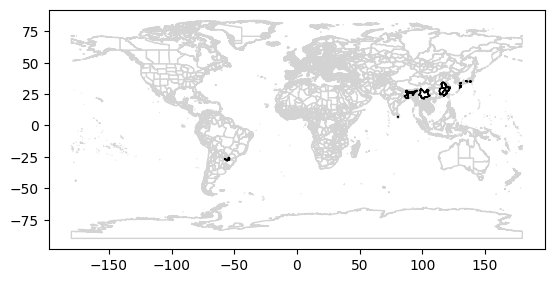

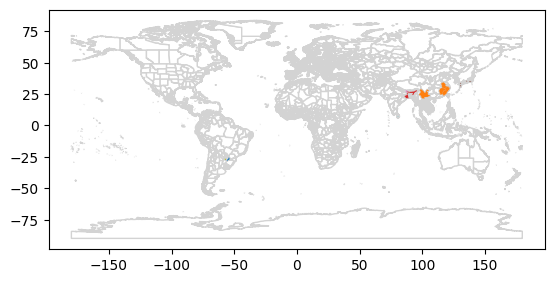

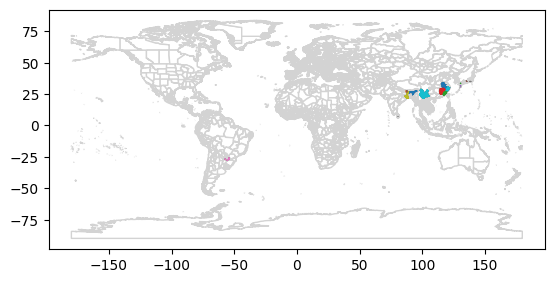

In [ ]:
# Filtred points
base = world.plot(color='white', edgecolor='lightgrey')
filtered_df.plot(ax=base, color='None', edgecolor='black');
# World countries intersecting with the points
base = world.plot(color='white', edgecolor='lightgrey')
filtered_df.plot(ax=base, column='admin');
# Points with joined country names
base = world.plot(color='white', edgecolor='lightgrey')
filtered_joined.geometry.plot(ax=base, color='grey')
filtered_joined.plot(ax=base, column='name_left', legend=False);

In [ ]:
#China = world[world['admin'] == 'China']
#China
#sel = world.intersects(China.geometry.iloc[0])
#sel
#China_height = world[sel]
#China_height
#base = China.plot(color='white', edgecolor='lightgrey')
#China.plot(ax=base, color='None', edgecolor='black');
#base = China.plot(color='white', edgecolor='lightgrey')
#China.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
#world.plot(ax=base, color='None', edgecolor='black');

,iso_a2,name,fips,woe_label,woe_name,sov_a3,adm0_a3,admin,gu_a3,gn_name,geometry
36,CN,Shandong,CH25,"Shandong, CN, China",Shandong,CH1,CHN,China,CHN,Shandong Sheng,"MULTIPOLYGON (((120.74838 37.93871, 120.75457 37.89667, 120.72633 37.90884, 120.72706 37.94766, 120.74838 37.93871)), ((120.60678 37.97989, 120.62582 37.97256, 120.62289 37.9488, 120.60678 37.9798..."
88,CN,Paracel Islands,PF,None,Paracel Islands,CH1,CHN,China,PFA,None,"MULTIPOLYGON (((111.19654 15.77538, 111.1941 15.77611, 111.19288 15.77823, 111.1963 15.78571, 111.19939 15.78921, 111.20753 15.78929, 111.20851 15.78628, 111.20753 15.78217, 111.2046 15.77924, 111..."
1086,CN,Guangxi,CH16,"Guangxi, CN, China",Guangxi,CH1,CHN,China,CHN,Guangxi Zhuangzu Zizhiqu,"MULTIPOLYGON (((109.10092 21.02119, 109.09051 21.04194, 109.09986 21.0607, 109.12273 21.06542, 109.13624 21.05101, 109.1277 21.03217, 109.10092 21.02119)), ((109.74806 21.57494, 109.74806 21.57461..."
1095,CN,Guangdong,CH30,"Guangdong, CN, China",Guangdong,CH1,CHN,China,CHN,Guangdong Sheng,"MULTIPOLYGON (((113.54676 22.74188, 113.5732 22.7007, 113.63569 22.65648, 113.64183 22.60162, 113.60261 22.61152, 113.47651 22.71951, 113.47654 22.73127, 113.54676 22.74188)), ((113.59352 22.78482..."
1098,CN,Fujian,CH07,"Fujian, CN, China",Fujian,CH1,CHN,China,CHN,Fujian Sheng,"MULTIPOLYGON (((119.30543 26.03596, 119.40122 25.99604, 119.40496 25.97793, 119.38111 25.96699, 119.25758 26.00145, 119.20924 26.09858, 119.25758 26.04755, 119.30543 26.03596)), ((119.62696 26.107..."
1226,CN,Liaoning,CH19,"Liaoning, CN, China",Liaoning,CH1,CHN,China,CHN,Liaoning Sheng,"MULTIPOLYGON (((122.96437 39.51545, 122.96803 39.54108, 122.98976 39.54951, 123.04005 39.52973, 123.02996 39.50788, 122.97975 39.49934, 122.96437 39.51545)), ((121.42254 39.47451, 121.45045 39.450..."
1362,CN,Zhejiang,CH02,"Zhejiang, CN, China",Zhejiang,CH1,CHN,China,CHN,Zhejiang Sheng,"MULTIPOLYGON (((122.14324 29.73338, 122.18686 29.67341, 122.16293 29.65453, 122.16977 29.67503, 122.14942 29.66885, 122.14942 29.68183, 122.12745 29.66901, 122.10157 29.71971, 122.04005 29.71638, ..."
1363,CN,Shanghai,CH23,"Shanghai, CN, China",Shanghai,CH1,CHN,China,CHN,Shanghai Shi,"MULTIPOLYGON (((120.90934 31.01172, 120.86521 31.13572, 120.95823 31.13502, 121.06298 31.15368, 121.06127 31.26662, 121.12887 31.28026, 121.13558 31.37442, 121.18044 31.45123, 121.2487 31.48537, 1..."
1364,CN,Jiangsu,CH04,"Jiangsu, CN, China",Jiangsu,CH1,CHN,China,CHN,Jiangsu Sheng,"MULTIPOLYGON (((119.88071 32.12519, 119.90187 32.07339, 119.792 32.12177, 119.79103 32.16547, 119.81935 32.20376, 119.74985 32.22801, 119.71616 32.27265, 119.75082 32.29312, 119.8143 32.27558, 119..."
1394,CN,Hebei,CH10,"Hebei, CN, China",Hebei,CH1,CHN,China,CHN,Hebei Sheng,"MULTIPOLYGON (((117.23908 40.09262, 117.14844 39.95575, 117.17965 39.8794, 117.26311 39.85124, 117.1843 39.80878, 117.2029 39.7616, 117.16942 39.62725, 117.12218 39.618, 116.87564 39.68647, 116.87..."


In [ ]:
# 2. Feature Importance

In [4]:
# Load the excel file
my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'Tee2.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
print(df)

                       Tea  Theanine_mg_in_1g_tea  Caffeine_mg_in_1g_tea  \
0             Matcha_Basic                  10.00                  20.00   
1        Matcha_Ceremonial                  20.00                  20.00   
2                   Sencha                   2.92                  11.32   
3                   Pu_Erh                   0.01                  30.00   
4                Gunpowder                   3.83                  13.07   
5                   Oolong                   6.00                  20.00   
6                Earl_Grey                   2.70                  16.48   
7   Darjeeling_First_Flush                   4.25                  14.10   
8                    Assam                   5.69                  19.93   
9                   Ceylon                   4.33                  14.61   
10              Pai_Mu_Tan                   1.30                   4.00   
11                 Chun_Me                   6.11                  12.00   
12          

In [5]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.set_index("Tea",drop=True,inplace=True)

In [8]:
# sort by Average Elevation descending
df = df.sort_values('Average_Elevation_m', ascending=False)

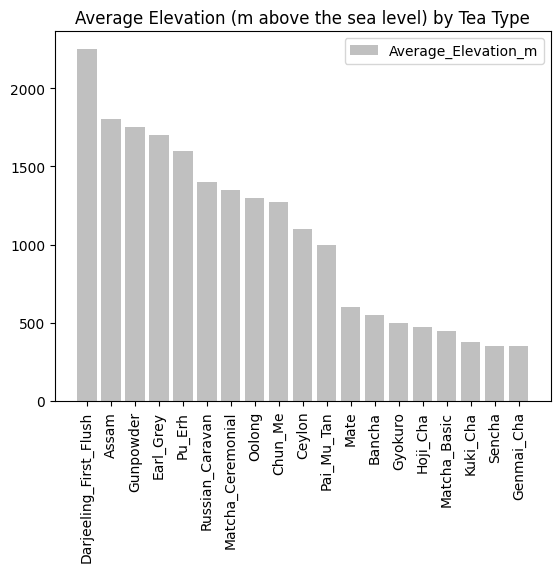

In [9]:
# generate the basic plot
fig, ax = plt.subplots()
# Average Elevation (m above the sea level) bars for every Tea
ax.bar(df.index, df['Average_Elevation_m'], label='Average_Elevation_m',color='#C0C0C0')
ax.set_title('Average Elevation (m above the sea level) by Tea Type')
ax.tick_params(axis='x', labelrotation=90)
ax.legend()

In [ ]:
# 2.1. Feature Importance - Categorical Variables - One Hot Encoding

In [10]:
# select the target variable
X = df.drop('Theanine_Share', axis=1)
y = df['Theanine_Share']

In [11]:
X = pd.get_dummies(X, columns=['Continent', 'Country', 'Woe_name', 'Flavor','Type', 'Color'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

/tmp/ipython-input-14-1753124155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, orient="h", palette="Greys_d")


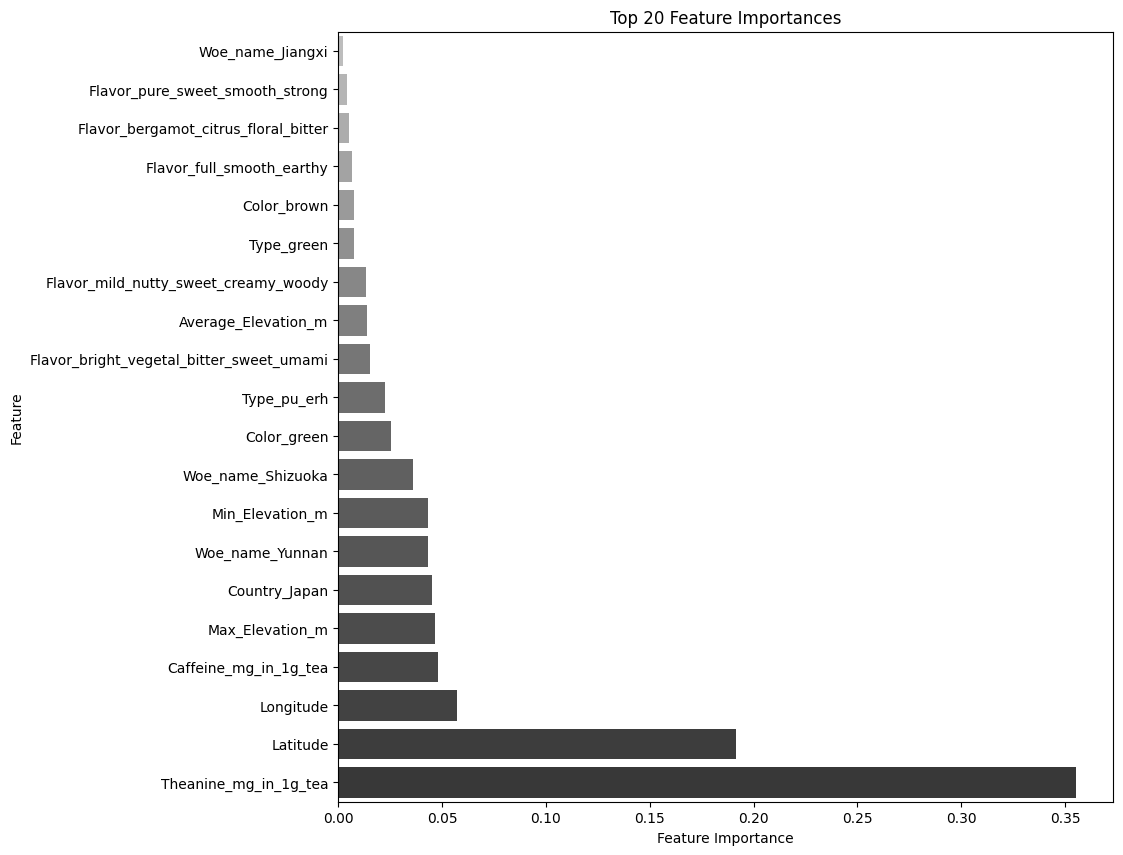

In [14]:
# Plot feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_n = 20
sorted_feature_importances = feature_importances.sort_values()[-top_n:]
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, orient="h", palette="Greys_d")
plt.title("Top {} Feature Importances".format(top_n))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# 2.2. Feature Importance - Numerical Variables - Correlation Matrix

In [15]:
df_num = df.drop(['Continent', 'Country', 'Woe_name', 'Flavor','Type', 'Color'], axis=1)
print(df_num)

#y = df['Theanine_Share']
#print(y)

                        Theanine_mg_in_1g_tea  Caffeine_mg_in_1g_tea  \
Tea                                                                    
Darjeeling_First_Flush                   4.25                  14.10   
Assam                                    5.69                  19.93   
Gunpowder                                3.83                  13.07   
Earl_Grey                                2.70                  16.48   
Pu_Erh                                   0.01                  30.00   
Russian_Caravan                          3.80                  16.13   
Matcha_Ceremonial                       20.00                  20.00   
Oolong                                   6.00                  20.00   
Chun_Me                                  6.11                  12.00   
Ceylon                                   4.33                  14.61   
Pai_Mu_Tan                               1.30                   4.00   
Mate                                     0.01                  3

<Axes: >

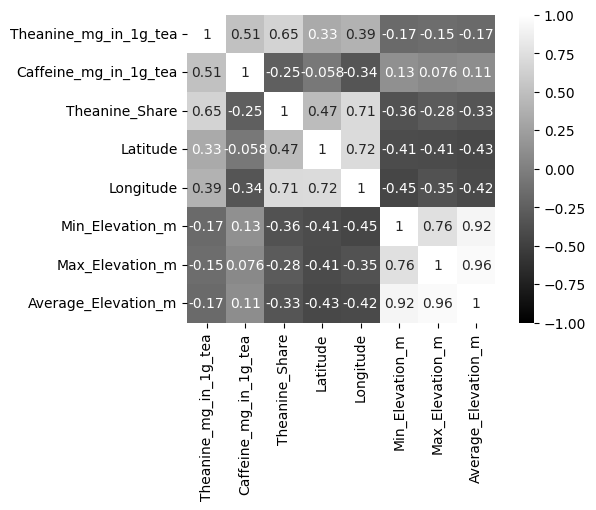

In [16]:
# seaborn correlation Matrix of numerical variables
f, ax = plt.subplots(figsize=(6, 4))
corr = df_num.corr()
sns.heatmap(corr,
    cmap='gray',
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, annot=True)

In [17]:
print (df.dtypes)

Theanine_mg_in_1g_tea    float64
Caffeine_mg_in_1g_tea    float64
Theanine_Share           float64
Continent                 object
Country                   object
Woe_name                  object
Latitude                 float64
Longitude                float64
Flavor                    object
Min_Elevation_m            int64
Max_Elevation_m            int64
Average_Elevation_m        int64
Type                      object
Color                     object
dtype: object


In [18]:
# convert data type
df['Theanine_mg_in_1g_tea'] = df.Theanine_mg_in_1g_tea.astype(float)

In [ ]:
# 2.3. Feature Importance - Categorical and Numerical Columns Both
# Target Variable is Theanine_Share

In [25]:
X = df.drop(['Theanine_Share'], axis=1)
#print(df_num)

y = df['Theanine_Share']
#print(y)

In [21]:
categorical_columns = ["Continent","Country", "Woe_name", "Flavor","Type", "Color"]
numerical_columns = ["Latitude","Longitude","Theanine_mg_in_1g_tea", "Caffeine_mg_in_1g_tea", "Min_Elevation_m", "Max_Elevation_m", "Average_Elevation_m"]

In [27]:
#did a simple imputation to fill missing categorical var with mode. The only var missing is embarked with 2 missing values
enc = OrdinalEncoder()
X[categorical_columns] = enc.fit_transform(X[categorical_columns] )
X = X[categorical_columns + numerical_columns]


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

NameError: name 'x' is not defined

In [29]:
rf = RandomForestRegressor(
         n_estimators=100,
         n_jobs=-1,
         min_samples_leaf = 1,
         oob_score=True,
         random_state = 42)

In [30]:
# x_train and y_train rows count (e.g. 15) must be the same
print(X_train.shape)
print(y_train.shape)

(15, 56)
(15,)


In [31]:
print(X_train)

                   Theanine_mg_in_1g_tea  Caffeine_mg_in_1g_tea  Latitude  \
Tea                                                                         
Chun_Me                             6.11                  12.00   28.6742   
Kuki_Cha                            6.00                   6.00   34.9756   
Earl_Grey                           2.70                  16.48   25.0453   
Gyokuro                            30.00                  40.00   33.5902   
Matcha_Basic                       10.00                  20.00   35.0116   
Sencha                              2.92                  11.32   30.2655   
Gunpowder                           3.83                  13.07   30.2655   
Ceylon                              4.33                  14.61    6.9607   
Genmai_Cha                          6.54                   8.00   34.9756   
Pu_Erh                              0.01                  30.00   25.0453   
Bancha                              2.81                  11.82   31.5969   

In [ ]:
print(y_train)

Tea
Chun_Me              0.337383
Kuki_Cha             0.500000
Earl_Grey            0.140772
Gyokuro              0.428571
Matcha_Basic         0.333333
Sencha               0.205056
Gunpowder            0.226627
Ceylon               0.228617
Genmai_Cha           0.449794
Pu_Erh               0.000333
Bancha               0.192071
Oolong               0.230769
Pai_Mu_Tan           0.245283
Hoji_Cha             0.285714
Matcha_Ceremonial    0.500000
Name: Theanine_Share, dtype: float64


In [32]:
rf.fit(X_train, y_train)

print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 0.906
RF test accuracy: 0.008


<Axes: >

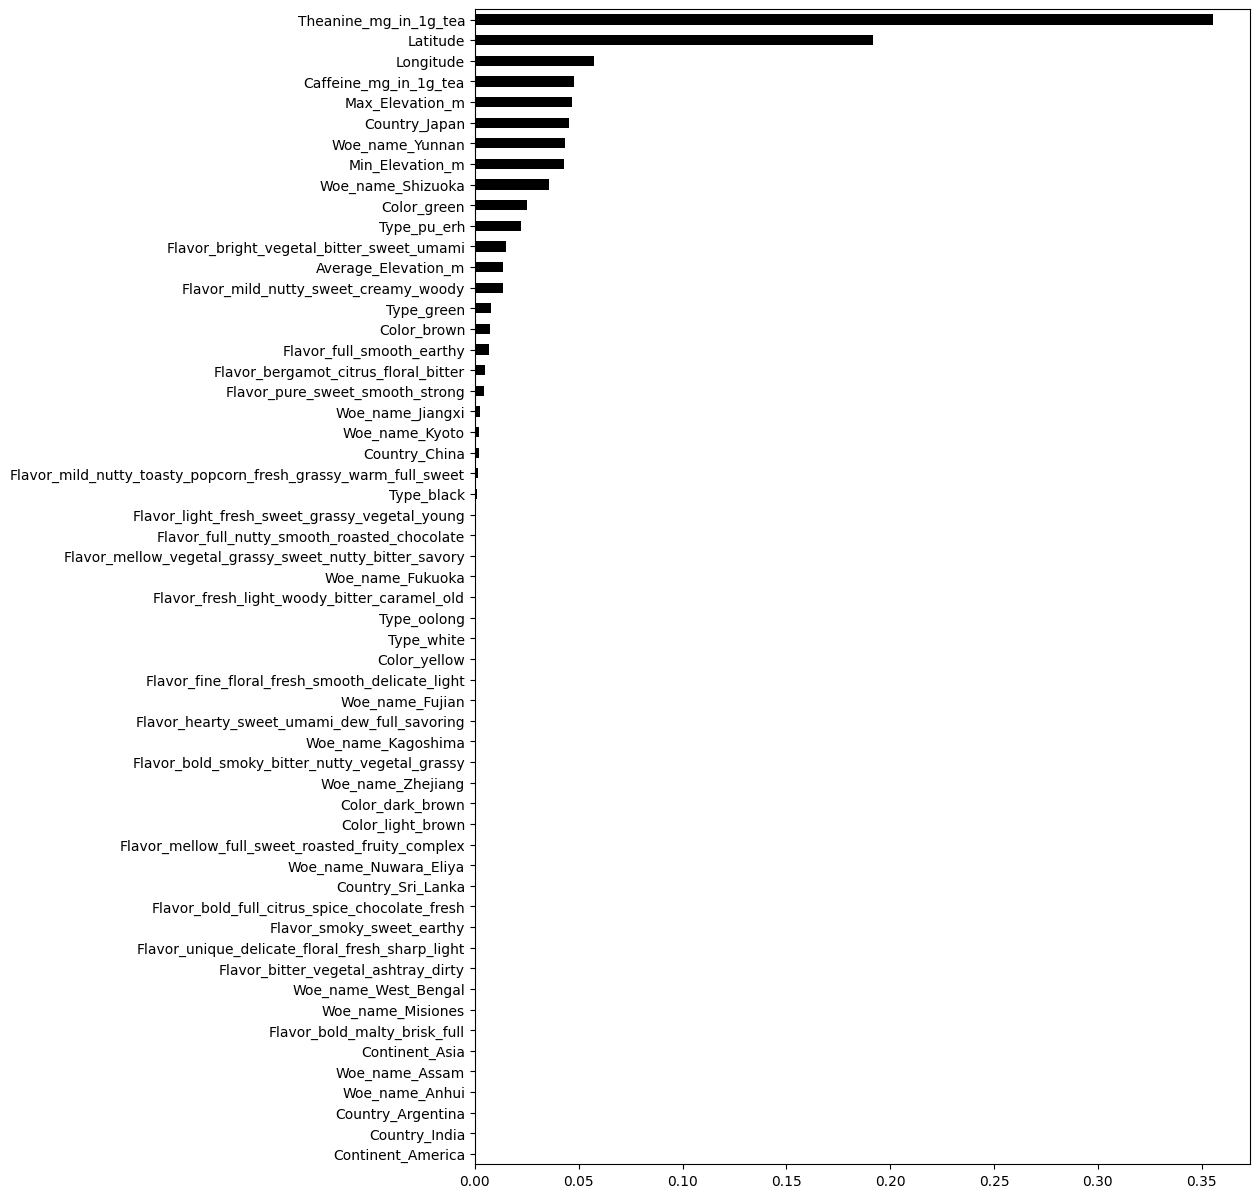

In [33]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh', color="#000000", figsize=(10, 15))